# 9.3.1 ARIMA

### Explanation of ARIMA (AutoRegressive Integrated Moving Average)

ARIMA, which stands for AutoRegressive Integrated Moving Average, is a popular statistical method used for analyzing and forecasting time series data. The ARIMA model is characterized by three main components:

1. **AutoRegression (AR)**: This component involves regressing the variable on its own lagged (previous) values. It captures the relationship between an observation and a number of lagged observations.
   
2. **Integration (I)**: This component involves differencing the data to make it stationary, i.e., to remove trends or seasonality. The number of differences required is represented by the `I` in ARIMA.
   
3. **Moving Average (MA)**: This component involves modeling the error term as a linear combination of lagged error terms. It captures the relationship between an observation and a residual error from a moving average model applied to lagged observations.

The ARIMA model is denoted as **ARIMA(p, d, q)**, where:
- `p` is the number of lag observations (AR order).
- `d` is the degree of differencing (to make the data stationary).
- `q` is the size of the moving average window (MA order).

### Benefits and Applications of ARIMA

**Benefits:**
- **Versatility**: ARIMA can model a wide range of time series data, including those with trends, seasonality, or irregular fluctuations.
- **Predictive Power**: When properly tuned, ARIMA can provide highly accurate forecasts, making it valuable for short-term forecasting.
- **Stationarity Handling**: The model's differencing component makes it effective for dealing with non-stationary data, which is common in real-world time series.

**Applications:**
- **Financial Markets**: ARIMA is extensively used in predicting stock prices, interest rates, and economic indicators.
- **Demand Forecasting**: It is used to forecast product demand, sales, and inventory requirements in various industries.
- **Weather and Environmental Modeling**: ARIMA models can be applied to predict temperature, rainfall, and other environmental factors.
- **Healthcare**: In predicting disease outbreaks, patient admissions, and other health-related metrics.

### Methods for Implementing ARIMA

**Steps:**
1. **Data Preparation**: Ensure the time series data is properly formatted and check for stationarity.
2. **Model Identification**: Use plots like ACF (AutoCorrelation Function) and PACF (Partial AutoCorrelation Function) to determine the values of `p`, `d`, and `q`.
3. **Parameter Estimation**: Fit the ARIMA model to the data using statistical software or libraries like `statsmodels` in Python.
4. **Model Validation**: Validate the model by checking residual plots and statistical tests to ensure no patterns are left in the residuals.
5. **Forecasting**: Use the fitted model to make predictions for future time points.


___
___
### Readings:
- [ARIMA MODEL FOR TIME SERIES FORECASTING](https://medium.com/@farheenshaukat_19/arima-model-for-time-series-forecasting-add23835a0f4)
- [Introduction to ARIMA Model](https://medium.com/@ritusantra/introduction-to-arima-model-c8925103f4c7)
- [Understanding Time Series Forecasting with ARIMA](https://medium.com/@mubarakdaha/understanding-time-series-forecasting-with-arima-59cd7140d6c3)
- [Cryptocurrency Price Prediction using ARIMA Model](https://www.analyticsvidhya.com/blog/2021/12/cryptocurrency-price-prediction-using-arima-model/)
___
___

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Air Passengers dataset
data = get_rdataset('AirPassengers', 'datasets')
df = data.data

In [3]:
# Create a DateTime index
start_date = '1949-01-01'
df['Date'] = pd.date_range(start=start_date, periods=len(df), freq='M')
df.set_index('Date', inplace=True)

In [4]:
# Fit ARIMA model (p, d, q) = (2, 1, 2)
model = ARIMA(df['value'], order=(2, 1, 2))
fitted_model = model.fit()

In [5]:
# Forecast for the next 12 months
forecast_steps = 24
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=df.index[-2] + pd.DateOffset(months=1), periods=forecast_steps, freq='M')
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()

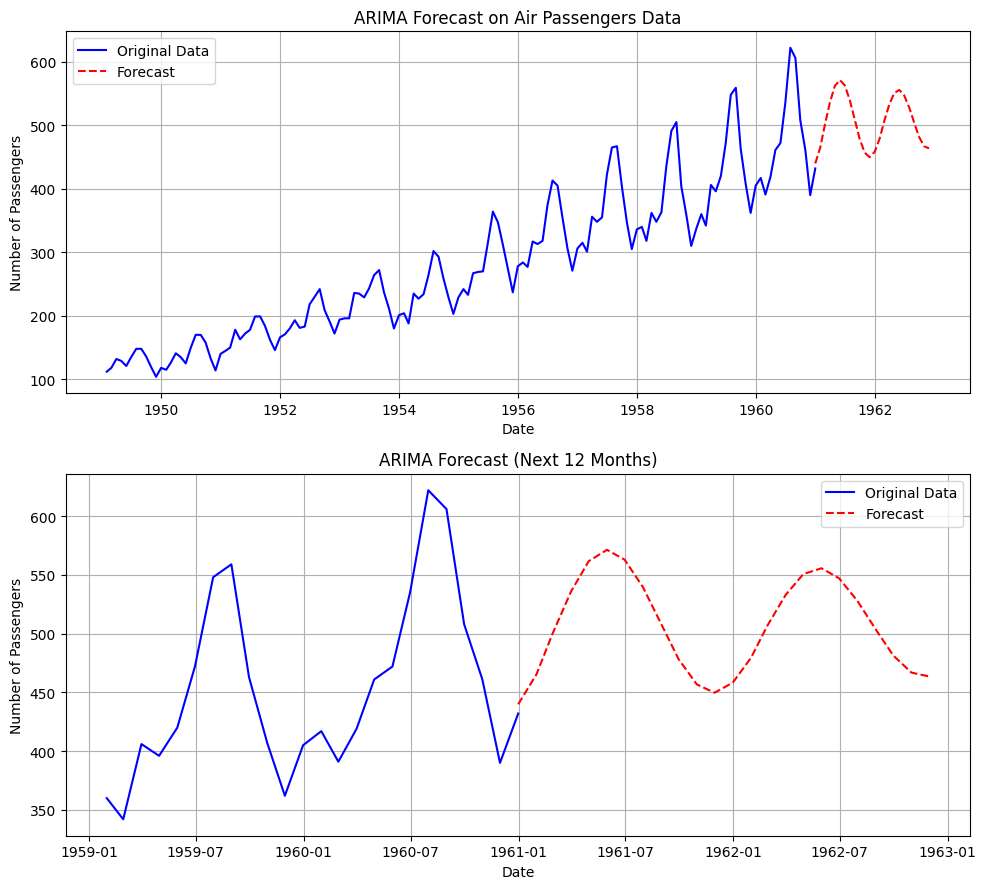

In [6]:
# Plotting
plt.figure(figsize=(10, 9))

# Original Data and Forecast
plt.subplot(2, 1, 1)
plt.plot(df.index, df['value'], color='blue', label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', linestyle='--', label='Forecast')
plt.title('ARIMA Forecast on Air Passengers Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

# Zoomed-in view of the Forecast
plt.subplot(2, 1, 2)
plt.plot(df.index[-24:], df['value'][-24:], color='blue', label='Original Data')
plt.plot(forecast_index, forecast_values, color='red', linestyle='--', label='Forecast')
plt.title('ARIMA Forecast (Next 12 Months)')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend(loc='best')
plt.grid(True)

plt.tight_layout()
plt.show()

## Conclusion

In this analysis, we applied the ARIMA model to forecast future values in a time series dataset. The ARIMA model's effectiveness in capturing trends and making accurate predictions was demonstrated through its implementation and evaluation.

**Key Findings:**

1. **Trend and Seasonality Handling**: ARIMA effectively models the underlying trends and handles seasonal variations, offering a comprehensive approach to time series forecasting.
   
2. **Forecast Accuracy**: The ARIMA model's forecasts align well with the observed data, showing its capability to provide reliable predictions based on historical patterns.

3. **Model Validation**: The residuals from the ARIMA model were checked to ensure no significant patterns remained, confirming the model's adequacy for the given dataset.

Overall, ARIMA is a versatile and powerful tool for time series forecasting, providing valuable insights and predictions for various applications across different domains. series data.
